In [17]:
import numpy as np
import matplotlib.pyplot as plt

def func(x, A, B, C): return A*np.e**(B * x) -C

Text(0.05, 0.1, 'If the equation is $I = Ae^{BV} - C$,\nthen the values of A, B and C are:\n\t$A = -0.0034$\n\t$B = 7.0663$\n\t$C = -184.7790$\n')

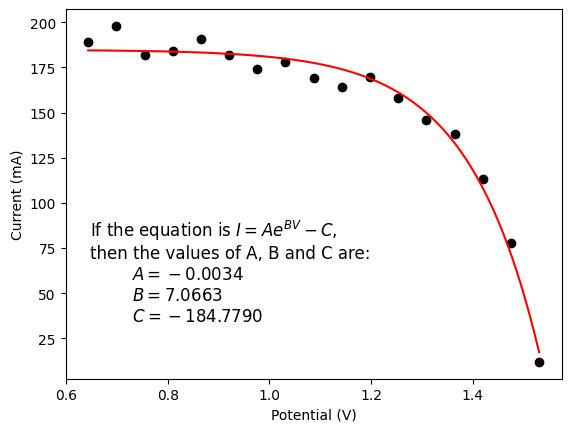

In [3]:
x = [1.531, 1.475, 1.42, 1.365, 1.309, 1.254, 1.198, 1.143, 1.087, 1.031, 0.976, 0.921, 0.865, 0.81, 0.754, 0.698, 0.643]
y = [12, 78, 113, 138, 146, 158, 170, 164, 169, 178, 174, 182, 191, 184, 182, 198, 189]
y_copy = y

A = -0.00335234
B = 7.06627
C = -184.779

x_ = np.linspace(min(x), max(x), 100)
y_ = func(x_, A, B, C)

plt.plot(x, y, 'ko')
plt.plot(x_, y_, 'r')
plt.xlabel('Potential (V)')
plt.ylabel(r'Current (mA)')

text = r"If the equation is $I = Ae^{BV} - C$," + "\nthen the values of A, B and C are:\n"
text += f"\t$A = {A:.4f}$\n"
text += f"\t$B = {B:.4f}$\n"
text += f"\t$C = {C:.4f}$\n"
# print(text)

plt.text(0.05, 0.1, text, fontsize=12, transform=plt.gca().transAxes)

In [16]:
x_p = [1.53, 1.494, 1.445, 1.395, 1.346, 1.296, 1.246, 1.197, 1.147, 1.098, 1.048, 0.998, 0.949, 0.899, 0.85, 0.8]
y_p = [2, 23, 46, 64, 82, 95, 110, 120, 131, 145, 151, 156, 158, 165, 174, 176]
x_g = [1.494, 1.445, 1.395, 1.346, 1.296, 1.246, 1.197, 1.147, 1.098, 1.048, 0.998, 0.949, 0.899, 0.85, 0.8]
y_g = [10, 45, 62, 76, 87, 95, 96, 98, 102, 105, 106, 107, 108, 108, 108]	
x_r = [1.54, 1.54, 1.494, 1.445, 1.395, 1.346, 1.296, 1.246, 1.197, 1.147, 1.098, 1.048, 0.998, 0.949, 0.899, 0.85, 0.8]
y_r = [9, 1, 35, 72, 90, 104, 112, 131, 137, 144, 150, 155, 157, 160, 162, 162, 163]
x_y = [1.54, 1.457, 1.372, 1.29, 1.207, 1.123, 1.038, 0.955, 0.873, 0.788, 0.703, 0.62, 0.539]
y_y = [1, 70, 113, 133, 149, 160, 162, 163, 164, 165, 164, 170, 168]

#        A        B         C      parameters for colour
w = [-0.00335234, 7.06627, -184.779]  # - white
p = [-3.37796, 2.66995, -204.302]  # - pink
g = [-0.00087515, 7.75874, -106.478]  # - green
r = [-0.127055, 4.64488, -169.734]  # - red
y = [-0.00689883, 6.55393, -167.503]  # - yellow

Text(0, 0.5, 'Current (mA)')

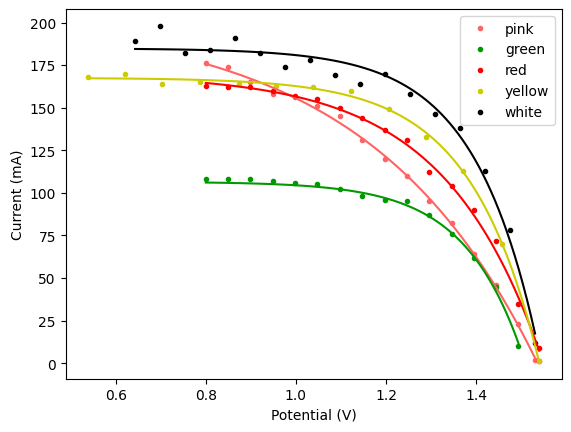

In [5]:
plt.plot(x_p, y_p, '#FF6363', marker=".", linestyle=" ", label='pink')
plt.plot(x_g, y_g, '#009900', marker=".", linestyle=" ", label='green')
plt.plot(x_r, y_r, '#FF0000', marker=".", linestyle=" ", label='red')
plt.plot(x_y, y_y, '#cccc00', marker=".", linestyle=" ", label='yellow')
plt.plot(x, y_copy,     'k',       marker=".", linestyle=" ", label='white')

x_ = np.linspace(min(x), max(x), 100)
plt.plot(x_, func(x_, *w), 'k')

x_p_ = np.linspace(min(x_p), max(x_p), 100)
plt.plot(x_p_, func(x_p_, *p), '#FF6363')
x_g_ = np.linspace(min(x_g), max(x_g), 100)
plt.plot(x_g_, func(x_g_, *g), '#009900')
x_r_ = np.linspace(min(x_r), max(x_r), 100)
plt.plot(x_r_, func(x_r_, *r), '#FF0000')
x_y_ = np.linspace(min(x_y), max(x_y), 100)
plt.plot(x_y_, func(x_y_, *y), '#cccc00')

plt.legend()
plt.xlabel('Potential (V)')
plt.ylabel('Current (mA)')

In [8]:
i = 2
for col in [w, p, g, r, y]:
    print(col[i])

-184.779
-204.302
-106.478
-169.734
-167.503


In [38]:
def root(func, A, B, C):
    x = 0
    dx = 0.1
    fwd = True
    while True:
        pred = func(x, A, B, C)
#         print(x, pred)
        if abs(pred) < 1e-6:
            return x
        if pred>0:
            if not fwd: dx /= 10
            x += dx
            fwd = True
        if pred<0:
            if fwd: dx /= 10
            x -= dx
            fwd = False

In [40]:
print(root(func, *w))
print(root(func, *p))
print(root(func, *g))
print(root(func, *r))
print(root(func, *y))

1.5449816080000027
1.5364809500000018
1.5091437070000018
1.549527161
1.5406641060000024


In [9]:
print(func(0, *w))
print(func(0, *p))
print(func(0, *g))
print(func(0, *r))
print(func(0, *y))

184.77564766
200.92404
106.47712485
169.606945
167.49610116999997


In [42]:
def pmax(A, B, C, func = func):
    V = np.linspace(0, 1.6, 1000)
    I = func(V, A, B, C)/1000_000
    # i = np.argmax(V*I)
    return (V*I).max()/1000

In [43]:
print(pmax(*w)*10**9)
print(pmax(*p)*10**9)
print(pmax(*g)*10**9)
print(pmax(*r)*10**9)
print(pmax(*y)*10**9)

202.7598037608507
156.03081685470292
116.19178773901729
164.67964757897792
179.4766894996358
